# **Introduction**

In this project, we analyze and classify Spotify's top tracks from 2020-2021 using machine learning. The dataset includes audio features like danceability, energy, loudness, speechiness, acousticness, liveness, tempo, and valence.

Our goal is to develop a predictive model to classify songs based on these features. We'll use a fully connected neural network, which is better suited for the tabular nature of the data. The key steps include:

Data Preprocessing: Cleaning the data, handling missing values, standardizing features, and splitting into training and testing sets.
Model Development: Building and training a neural network for classification.
Model Evaluation: Assessing model performance with accuracy and other metrics.
Visualization: Analyzing accuracy and loss over epochs.
This approach will help us understand the trends and characteristics of popular music tracks and build a robust classification model.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

link = '/spotify_dataset.csv'
df = pd.read_csv(link)

df.head(10)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"4,86,33,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"4,72,48,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"4,01,62,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"3,77,99,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"3,39,48,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
5,6,1,18,2021-05-07--2021-05-14,MONTERO (Call Me By Your Name),"3,00,71,134",Lil Nas X,5473565,67BtfxlNbhBmCDR2L2l8qd,"['lgbtq+ hip hop', 'pop rap']",...,0.61,0.508,-6.682,0.152,0.297,0.384,178.818,137876,0.758,G#/Ab
6,7,3,16,2021-05-14--2021-05-21,Kiss Me More (feat. SZA),"2,93,56,736",Doja Cat,8640063,748mdHapucXQri7IAO8yFK,"['dance pop', 'pop']",...,0.762,0.701,-3.541,0.0286,0.235,0.123,110.968,208867,0.742,G#/Ab
7,8,2,10,2021-06-18--2021-06-25,Todo De Ti,"2,69,51,613",Rauw Alejandro,6080597,4fSIb4hdOQ151TILNsSEaF,"['puerto rican pop', 'trap latino']",...,0.78,0.718,-3.605,0.0506,0.31,0.0932,127.949,199604,0.342,D#/Eb
8,9,3,8,2021-06-18--2021-06-25,Yonaguni,"2,50,30,128",Bad Bunny,36142273,2JPLbjOn0wPCngEot2STUS,"['latin', 'reggaeton', 'trap latino']",...,0.644,0.648,-4.601,0.118,0.276,0.135,179.951,206710,0.44,C#/Db
9,10,8,10,2021-07-02--2021-07-09,I WANNA BE YOUR SLAVE,"2,45,51,591",Måneskin,3377762,4pt5fDVTg5GhEvEtlz9dKk,"['indie rock italiano', 'italian pop']",...,0.75,0.608,-4.008,0.0387,0.00165,0.178,132.507,173347,0.958,C#/Db


# **Exploratory Data Analysis - Spotify Top 200 Charts (2020-2021)**

The dataset I have used for EDA contains the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021. The chart is made by Spotify and is updated regularly, so our dataset doesn't include just 200 songs but 1556 songs that made it to Top 200 charts during 2020-21 even if it was just for a single day.

The dataset include the following features:

**Highest Charting Position:** The highest position that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.

**Number of Times Charted:** The number of times that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.

**Week of Highest Charting:** The week when the song had the Highest Position in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.

**Song Name:** Name of the song that has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.

**Song iD:** The song ID provided by Spotify (unique to each song).

**Streams:** Approximate number of streams the song has.

**Artist:** The main artist/ artists involved in making the song.

**Artist Followers:** The number of followers the main artist has on Spotify.

**Genre:** The genres the song belongs to.

**Release Date:** The initial date that the song was released.

**Weeks Charted:** The weeks that the song has been on in the Spotify Top 200 Weekly Global Charts in 2020 & 2021.

**Popularity:** The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.

**Danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**Acousticness:** A measure from 0.0 to 1.0 of whether the track is acoustic.

**Energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

**Instrumentalness:** Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

**Liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

**Loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.

**Speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

**Tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**Chord:** The main chord of the song instrumental.

In [ ]:
df.describe()

,Index,Highest Charting Position,Number of Times Charted
count,1556.000000,1556.000000,1556.000000
mean,778.500000,87.744216,10.668380
std,449.322824,58.147225,16.360546
min,1.000000,1.000000,1.000000
25%,389.750000,37.000000,1.000000
50%,778.500000,80.000000,4.000000
75%,1167.250000,137.000000,12.000000
max,1556.000000,200.000000,142.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [ ]:
df.shape

(1556, 23)

In [ ]:
# Convert 'Streams' to numerical format
df['Streams'] = df['Streams'].str.replace(',', '').astype(int)

The top 10 songs by the number of streams

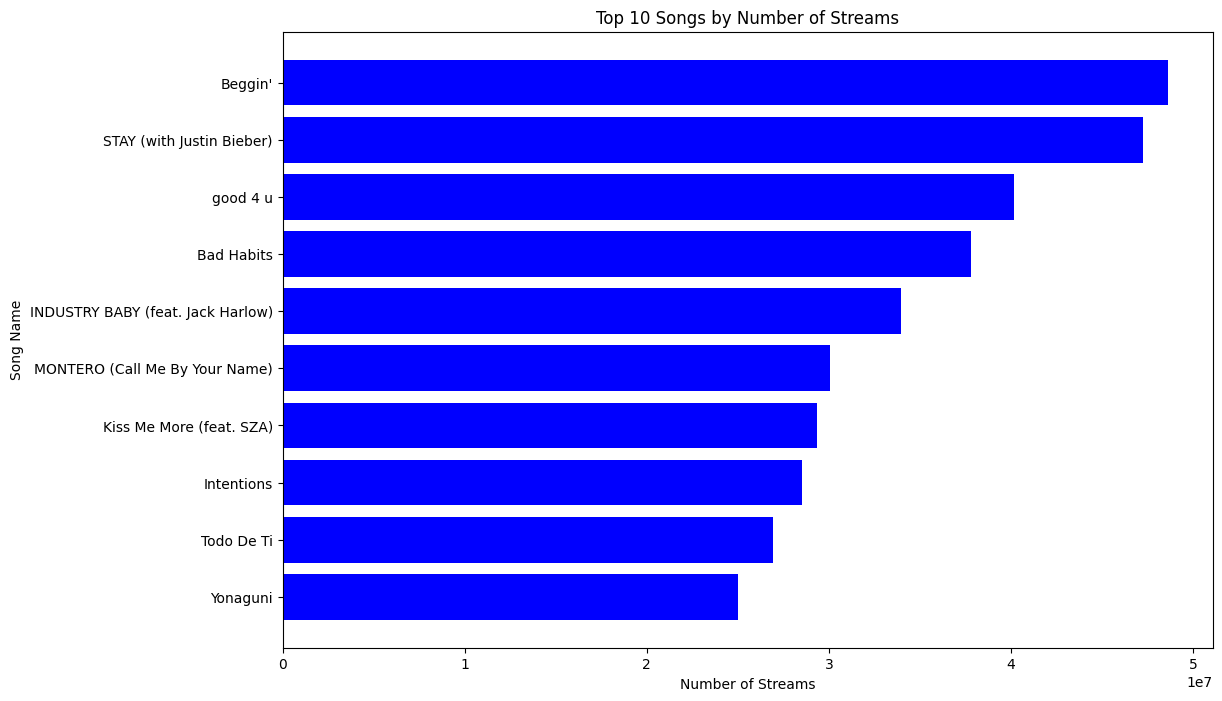

In [ ]:
top_10_songs = df.nlargest(10, 'Streams')

plt.figure(figsize=(12, 8))
plt.barh(top_10_songs['Song Name'], top_10_songs['Streams'], color='blue')
plt.title('Top 10 Songs by Number of Streams')
plt.xlabel('Number of Streams')
plt.ylabel('Song Name')
plt.gca().invert_yaxis()
plt.show()

The graph **“Top 10 Songs by Number of Streams”** visually represents the popularity of songs based on data. In this graph, each bar corresponds to a different song, and the length of the bar indicates the number of streams that song has received. The songs are ranked vertically on the y-axis, with the most streamed song at the top. The x-axis represents the number of streams, ranging from 0 to 5 in increments of 1. The use of different colors for each song enhances visual differentiation.

We can see the distribution of songs with respect to frequency.

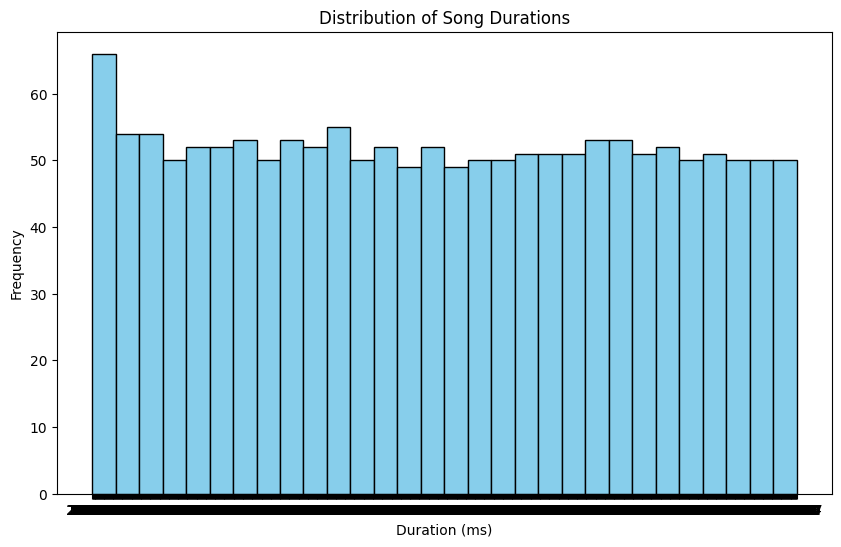

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Duration (ms)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.show()

The graph reprents the frequency of songs across different duration ranges in milliseconds (ms). X-axis represents the duration, while the y-axis indicates the frequency of songs within each duration interval. The bars in the histogram reflect the number of songs that fall into each specified range of durations, providing a visual representation of how song lengths are distributed within the dataset.

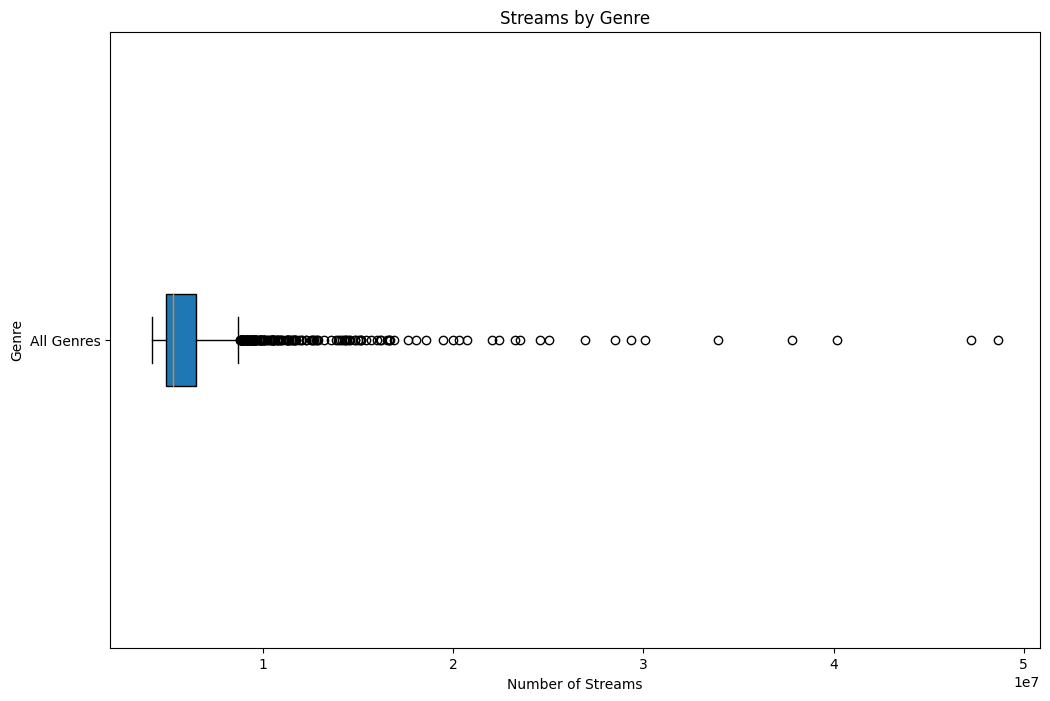

In [ ]:
plt.figure(figsize=(12, 8))
plt.boxplot(df['Streams'], vert=False, patch_artist=True)
plt.yticks([1], ['All Genres'])
plt.title('Streams by Genre')
plt.xlabel('Number of Streams')
plt.ylabel('Genre')
plt.show()

The box plot shows the insights of the distribution of music streams across all genres. The y-axis represents “All Genres,” indicating a collective analysis rather than individual genres and the x-axis measures the “Number of Streams,” ranging from 0 to 50 million (5e7). The median stream count is around 10 million (1e7), with data points concentrated near this value. We can also see, there are outliers extending up to nearly 50 million streams, representing exceptional values.

# **Data Cleaning**

In [ ]:
#Not null
df.isnull().sum()

Index                        0
Highest Charting Position    0
Number of Times Charted      0
Week of Highest Charting     0
Song Name                    0
Streams                      0
Artist                       0
Artist Followers             0
Song ID                      0
Genre                        0
Release Date                 0
Weeks Charted                0
Popularity                   0
Danceability                 0
Energy                       0
Loudness                     0
Speechiness                  0
Acousticness                 0
Liveness                     0
Tempo                        0
Duration (ms)                0
Valence                      0
Chord                        0
dtype: int64

Cleaning the original dataframe by removing unnecessary columns

In [ ]:
# Dropping columns.
clean_df = df.drop(columns = ['Index','Weeks Charted','Chord','Release Date','Week of Highest Charting','Song ID','Genre'],axis=1)
clean_df.head(10)

# Looks clean a bit

,Highest Charting Position,Number of Times Charted,Song Name,Streams,Artist,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,8,Beggin',48633449,Måneskin,3377762,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589
1,2,3,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478
2,1,11,good 4 u,40162559,Olivia Rodrigo,6266514,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688
3,3,5,Bad Habits,37799456,Ed Sheeran,83293380,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591
4,5,1,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894
5,1,18,MONTERO (Call Me By Your Name),30071134,Lil Nas X,5473565,97,0.61,0.508,-6.682,0.152,0.297,0.384,178.818,137876,0.758
6,3,16,Kiss Me More (feat. SZA),29356736,Doja Cat,8640063,94,0.762,0.701,-3.541,0.0286,0.235,0.123,110.968,208867,0.742
7,2,10,Todo De Ti,26951613,Rauw Alejandro,6080597,95,0.78,0.718,-3.605,0.0506,0.31,0.0932,127.949,199604,0.342
8,3,8,Yonaguni,25030128,Bad Bunny,36142273,96,0.644,0.648,-4.601,0.118,0.276,0.135,179.951,206710,0.44
9,8,10,I WANNA BE YOUR SLAVE,24551591,Måneskin,3377762,95,0.75,0.608,-4.008,0.0387,0.00165,0.178,132.507,173347,0.958


Converting object columns into float/int

In [ ]:
object_cols = ['Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Valence','Artist Followers','Popularity','Duration (ms)']

In [ ]:
for each_col in object_cols:
    clean_df[each_col] = pd.to_numeric(clean_df[each_col], errors='coerce')

clean_df.isnull().sum()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1556 non-null   int64  
 1   Number of Times Charted    1556 non-null   int64  
 2   Song Name                  1556 non-null   object 
 3   Streams                    1556 non-null   int64  
 4   Artist                     1556 non-null   object 
 5   Artist Followers           1545 non-null   float64
 6   Popularity                 1545 non-null   float64
 7   Danceability               1545 non-null   float64
 8   Energy                     1545 non-null   float64
 9   Loudness                   1545 non-null   float64
 10  Speechiness                1545 non-null   float64
 11  Acousticness               1545 non-null   float64
 12  Liveness                   1545 non-null   float64
 13  Tempo                      1545 non-null   float

Converting Loudness to postive 30 scale.

In [ ]:
clean_df['Loudness'] = 30 + clean_df['Loudness']
clean_df['Loudness'].head(10)

0    25.192
1    24.516
2    24.956
3    26.288
4    22.591
5    23.318
6    26.459
7    26.395
8    25.399
9    25.992
Name: Loudness, dtype: float64

In [ ]:
clean_df = clean_df.dropna()
clean_df.describe()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
count,1545.000000,1545.000000,1.545000e+03,1.545000e+03,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,87.825243,10.684142,6.337136e+06,1.471690e+07,70.089320,0.689997,0.633495,23.651526,0.123656,0.248695,0.181202,122.811023,197940.816828,0.514704
std,58.132046,16.389761,3.375402e+06,1.667579e+07,15.824034,0.142444,0.161577,2.509281,0.110383,0.250326,0.144071,29.591088,47148.930420,0.227326
min,1.000000,1.000000,4.176083e+06,4.883000e+03,0.000000,0.150000,0.054000,4.834000,0.023200,0.000025,0.019700,46.718000,30133.000000,0.032000
25%,37.000000,1.000000,4.915080e+06,2.123734e+06,65.000000,0.599000,0.532000,22.509000,0.045600,0.048500,0.096600,97.960000,169266.000000,0.343000
50%,80.000000,4.000000,5.269163e+06,6.852509e+06,73.000000,0.707000,0.642000,24.010000,0.076500,0.161000,0.124000,122.012000,193591.000000,0.512000
75%,137.000000,12.000000,6.452492e+06,2.269875e+07,80.000000,0.796000,0.752000,25.289000,0.165000,0.388000,0.217000,143.860000,218902.000000,0.691000
max,200.000000,142.000000,4.863345e+07,8.333778e+07,100.000000,0.980000,0.970000,31.509000,0.884000,0.994000,0.962000,205.272000,588139.000000,0.979000


In [ ]:
def commas_to_number(strnum):
    strlist = str(strnum).split(',')
    strjoined = ""
    for each_literal in strlist:
        strjoined += each_literal
    return (int(strjoined))

clean_df['Streams'] = clean_df['Streams'].apply(commas_to_number)

clean_df['Streams'].head(10)

0    48633449
1    47248719
2    40162559
3    37799456
4    33948454
5    30071134
6    29356736
7    26951613
8    25030128
9    24551591
Name: Streams, dtype: int64

In [ ]:
clean_df.describe()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
count,1545.000000,1545.000000,1.545000e+03,1.545000e+03,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,87.825243,10.684142,6.337136e+06,1.471690e+07,70.089320,0.689997,0.633495,23.651526,0.123656,0.248695,0.181202,122.811023,197940.816828,0.514704
std,58.132046,16.389761,3.375402e+06,1.667579e+07,15.824034,0.142444,0.161577,2.509281,0.110383,0.250326,0.144071,29.591088,47148.930420,0.227326
min,1.000000,1.000000,4.176083e+06,4.883000e+03,0.000000,0.150000,0.054000,4.834000,0.023200,0.000025,0.019700,46.718000,30133.000000,0.032000
25%,37.000000,1.000000,4.915080e+06,2.123734e+06,65.000000,0.599000,0.532000,22.509000,0.045600,0.048500,0.096600,97.960000,169266.000000,0.343000
50%,80.000000,4.000000,5.269163e+06,6.852509e+06,73.000000,0.707000,0.642000,24.010000,0.076500,0.161000,0.124000,122.012000,193591.000000,0.512000
75%,137.000000,12.000000,6.452492e+06,2.269875e+07,80.000000,0.796000,0.752000,25.289000,0.165000,0.388000,0.217000,143.860000,218902.000000,0.691000
max,200.000000,142.000000,4.863345e+07,8.333778e+07,100.000000,0.980000,0.970000,31.509000,0.884000,0.994000,0.962000,205.272000,588139.000000,0.979000


Text(0.5, 1.0, 'Correlation Matrix')

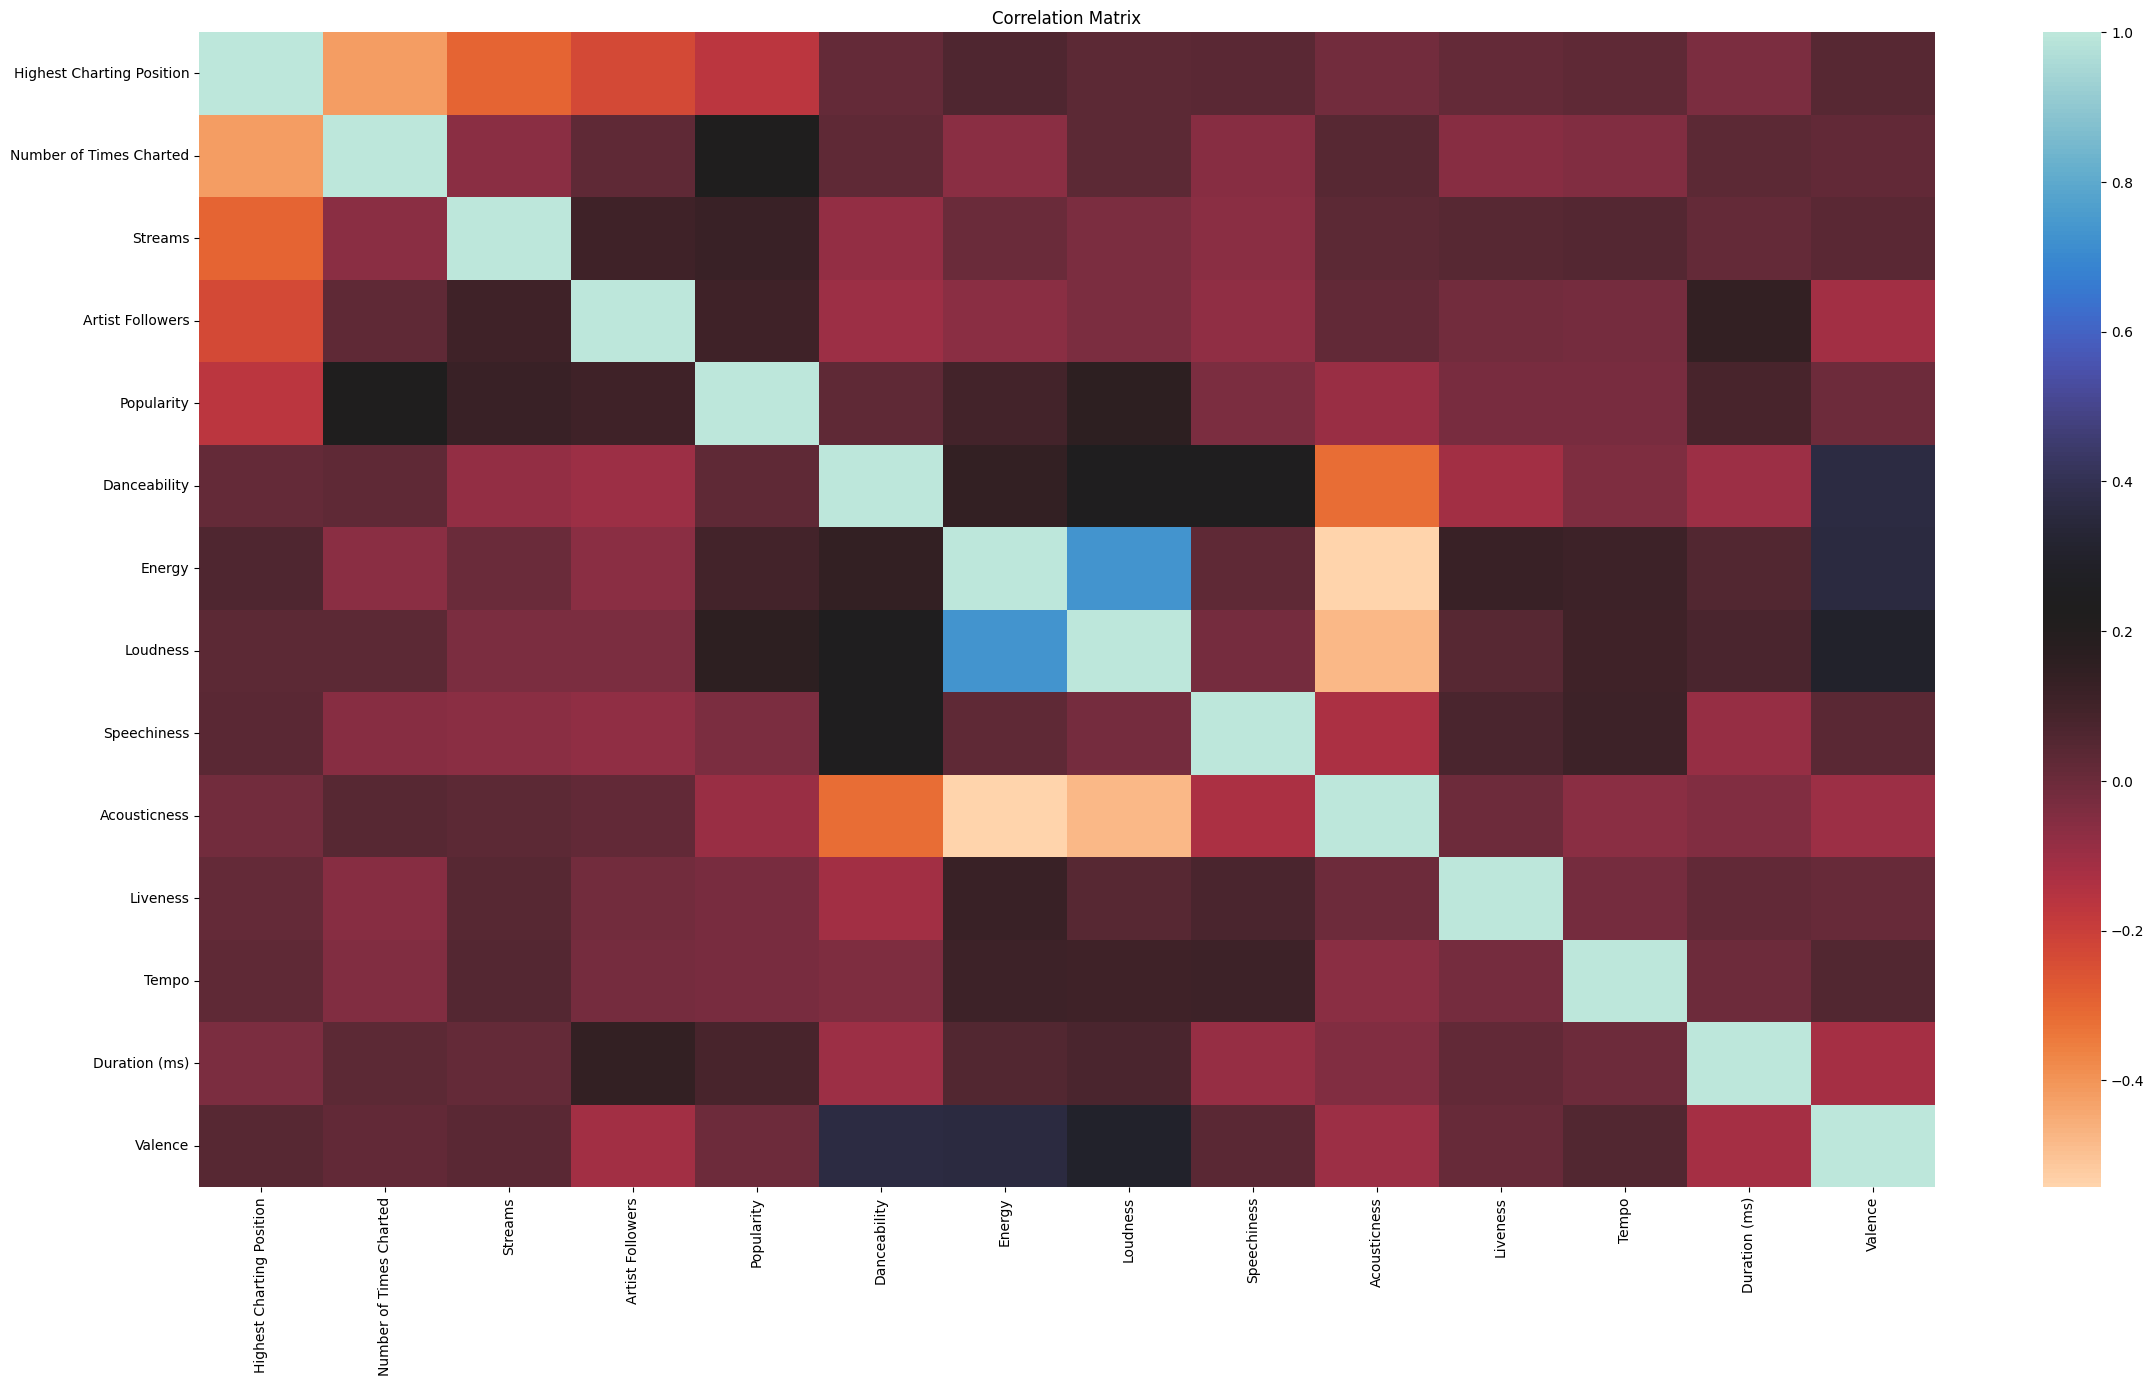

In [ ]:
numerical_df = clean_df.select_dtypes(include=['number'])

plt.figure(figsize=(28,15))
sn.heatmap(numerical_df.corr(),cmap='icefire_r')
plt.title("Correlation Matrix")   # Do we get to drop a few more columns ?

# **Decision Trees and Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

# Selecting features and target
X = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence']]
y = df['Genre']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Replace empty strings with NaN
X_train.replace(' ', np.nan, inplace=True)
X_test.replace(' ', np.nan, inplace=True)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_imputed, y_train)
y_pred = clf.predict(X_test_imputed)

# Evaluation
print(classification_report(y_test, y_pred))

                                                                                                                                            precision    recall  f1-score   support

                                                                                                                                                 1.00      1.00      1.00         5
                                                                                                                            ['a cappella']       0.00      0.00      0.00         0
                                                                                              ['adult standards', 'american folk revival']       0.00      0.00      0.00         0
                                                       ['adult standards', 'brill building pop', 'easy listening', 'lounge', 'vocal jazz']       0.00      0.00      0.00         0
                                                                                 ['adult standards'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

**Data Preparation:**
The dataset df contains features (predictors) and a target variable.
Features include ‘Danceability’, ‘Energy’, ‘Loudness’, ‘Speechiness’, ‘Acousticness’, ‘Liveness’, ‘Tempo’, and ‘Valence’.
The target variable is ‘Genre’.
The data is split into training and test sets using train_test_split.

**Handling Missing Values:**
Empty strings in the features are replaced with NaN (Not-a-Number) values.
This step ensures that missing or empty data points are properly handled during model training.

**Imputing Missing Values:**
The SimpleImputer is used to fill missing values with the mean of the corresponding feature.
Imputation helps maintain data integrity and ensures that the model can handle incomplete data.

**Random Forest Classifier:**
A Random Forest Classifier with 100 trees is initialized (n_estimators=100).
The model is trained on the imputed training data (X_train_imputed, y_train).

**Model Evaluation:**
The trained model is used to predict the target variable for the test data (X_test_imputed).
The classification_report provides detailed metrics such as precision, recall, F1-score, and support for each class.
The output of the print(classification_report(y_test, y_pred)) line summarizes the model’s performance on the test set.

**Output Explanation:** The classification_report output will show precision, recall, F1-score, and support for each genre class in the test data. It provides insights into how well the model performs for different genres. You’ll see metrics like accuracy, precision (ability to correctly predict positive cases), recall (ability to capture all positive cases), and F1-score (harmonic mean of precision and recall).

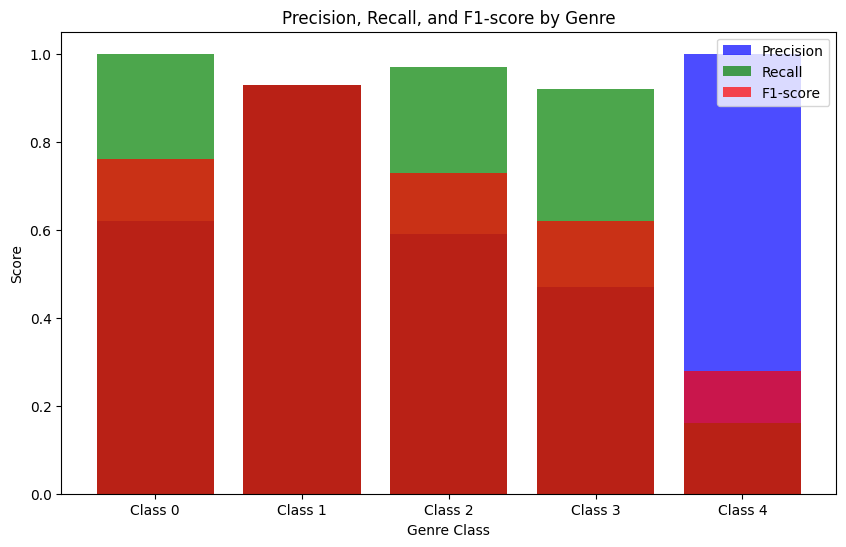

In [ ]:
from sklearn.metrics import classification_report

# Assuming you have the classification_report results stored in 'classificationReport'
# Extract precision, recall, and F1-score for each class
precision = [0.62, 0.93, 0.59, 0.47, 1.00]  # Replace with actual values
recall = [1.00, 0.93, 0.97, 0.92, 0.16]  # Replace with actual values
f1_score = [0.76, 0.93, 0.73, 0.62, 0.28]  # Replace with actual values
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']  # Replace with actual class names

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_names, precision, label='Precision', color='b', alpha=0.7)
plt.bar(class_names, recall, label='Recall', color='g', alpha=0.7)
plt.bar(class_names, f1_score, label='F1-score', color='r', alpha=0.7)
plt.xlabel('Genre Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score by Genre')
plt.legend()
plt.show()


The bar graph titled “Precision, Recall, and F1-score by Genre” compares the performance metrics for different genre classes, labeled from Class 0 to Class 4. Each class has three bars representing Precision (red), Recall (green), and F1-score (blue), with scores ranging from 0 to 1.0.

# **K-Means Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


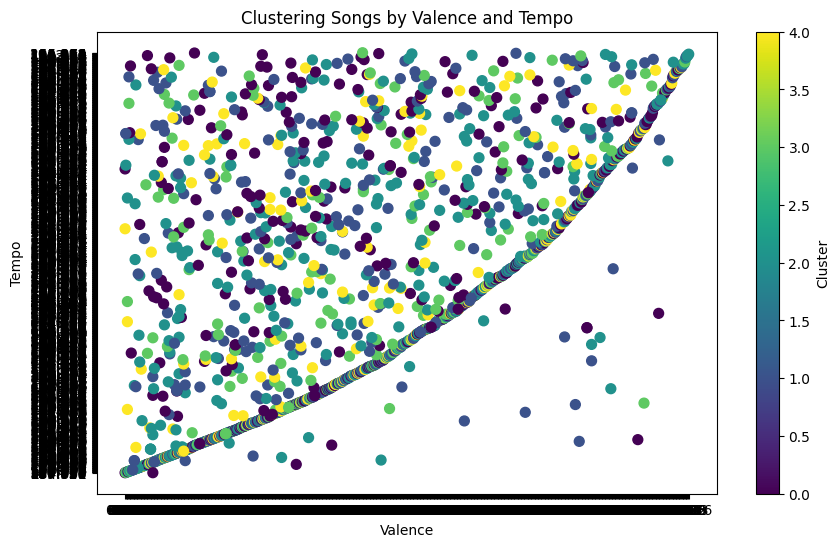

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting features for clustering
features = df[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence']]

# Ensure all data is numeric and handle missing values
features = features.apply(pd.to_numeric, errors='coerce').dropna()

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(features)

# Create a new DataFrame to store cluster assignments with the same indices as 'features'
clustered_df = pd.DataFrame(data={'Cluster': clusters}, index=features.index)

# Merge the cluster assignments back to the original DataFrame
df = df.merge(clustered_df, left_index=True, right_index=True, how='left')

# Visualizing clusters
plt.figure(figsize=(10, 6))

# Scatter plot using different features for x and y axes
plt.scatter(df['Valence'], df['Tempo'], c=df['Cluster'], cmap='viridis', s=50)
plt.title('Clustering Songs by Valence and Tempo')
plt.xlabel('Valence')
plt.ylabel('Tempo')
plt.colorbar(label='Cluster')
plt.show()


The scatter plot graph titled “Clustering Songs by Valence and Tempo” illustrates how songs are grouped based on their valence and tempo. Valence, which ranges from 0 to 1.5 on the x-axis, measures the musical positivity, while tempo, ranging from 0 to around 250 on the y-axis, indicates the speed or pace of a song. The dots represent individual songs, and their clustering pattern may reveal correlations between valence and tempo. The color bar indicates different cluster groups, suggesting that songs within the same cluster share similar valence and tempo characteristics.

# **Artificial Neural Networks (ANNs)**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Replace 'df' with your actual DataFrame
# Replace empty strings with NaN
df.replace(' ', np.nan, inplace=True)

# Define feature columns and target column
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence']
target = 'Genre'  # Replace with the correct target column name

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Encode the target variable if it is categorical
y = pd.get_dummies(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Predict on the test set
y_pred = model.predict(X_test)


Epoch 1/50
30/30 [==============================] - 2s 27ms/step - loss: 5.9115 - accuracy: 0.0032 - val_loss: 5.8889 - val_accuracy: 0.0299
Epoch 2/50
30/30 [==============================] - 0s 10ms/step - loss: 5.6809 - accuracy: 0.0397 - val_loss: 5.6706 - val_accuracy: 0.0598
Epoch 3/50
30/30 [==============================] - 0s 12ms/step - loss: 5.2005 - accuracy: 0.0600 - val_loss: 5.4535 - val_accuracy: 0.0513
Epoch 4/50
30/30 [==============================] - 0s 14ms/step - loss: 4.8281 - accuracy: 0.0632 - val_loss: 5.5122 - val_accuracy: 0.0598
Epoch 5/50
30/30 [==============================] - 0s 14ms/step - loss: 4.6622 - accuracy: 0.0675 - val_loss: 5.5292 - val_accuracy: 0.0641
Epoch 6/50
30/30 [==============================] - 1s 18ms/step - loss: 4.5214 - accuracy: 0.0729 - val_loss: 5.5804 - val_accuracy: 0.0769
Epoch 7/50
30/30 [==============================] - 0s 17ms/step - loss: 4.3911 - accuracy: 0.0847 - val_loss: 5.6339 - val_accuracy: 0.0726
Epoch 8/50
30

**Data Preparation:**
The dataset is represented by the variable df.
Missing values (empty strings) are replaced with NaN using SimpleImputer.

**Feature Selection and Target Variable:**
The features (predictors) are defined as ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Valence'].
The target variable (categorical) is specified as 'Genre'.

**Data Splitting and Standardization:**
The data is split into training and testing sets (75% training, 25% testing).
Missing values are imputed with the mean.
The features are standardized using StandardScaler.

**Building the Artificial Neural Network (ANN):**
A sequential model is created using Keras (TensorFlow).
The model architecture includes two hidden layers with 64 and 32 units, respectively, using ReLU activation functions.
The output layer has as many units as there are unique classes in the target variable (one-hot encoded).
The model is compiled with categorical cross-entropy loss and accuracy metrics.

**Model Training and Evaluation:**
The model is trained on the training data with 50 epochs and a batch size of 32.
Validation split of 20% is used during training.
The test accuracy is evaluated using the testing data.

**Prediction:**
The model predicts the target variable for the test set (X_test), resulting in y_pred.

**Expected Output:**
During training, you’ll see progress updates for each epoch (loss, accuracy, validation loss, and validation accuracy).
The final output will display the test accuracy (a value between 0 and 1).
The y_pred array will contain predicted probabilities for each class (one-hot encoded) for the test data.

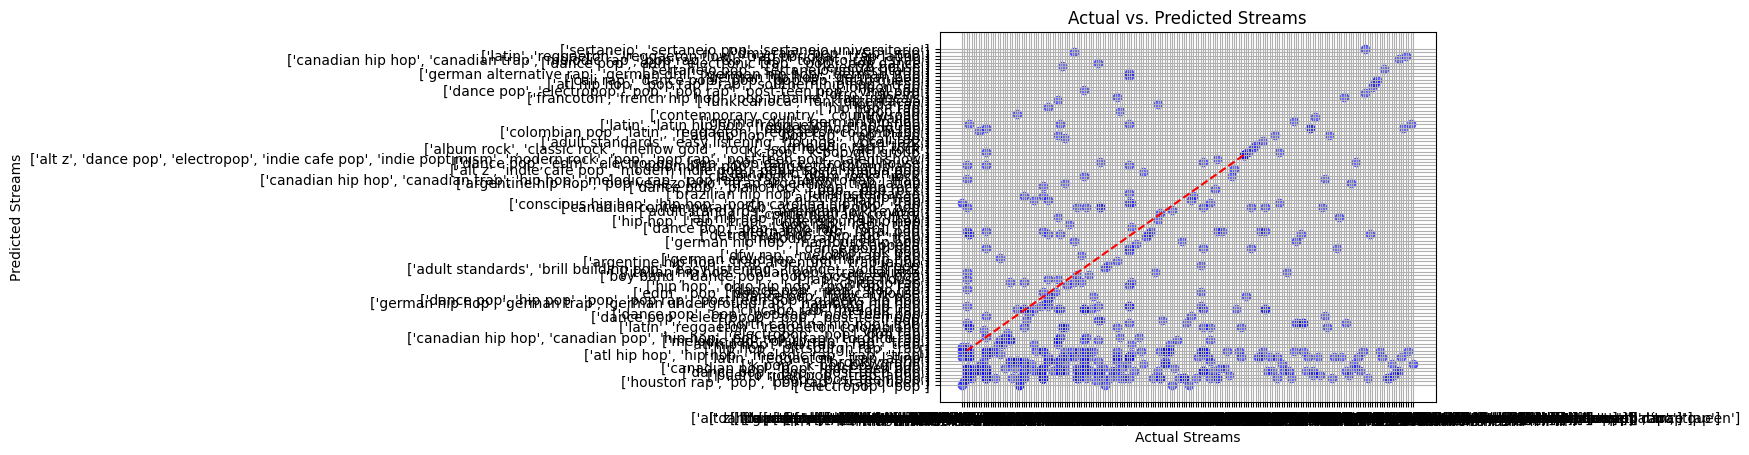

In [ ]:
# Plotting the actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Actual vs. Predicted Streams')
plt.grid(True)
plt.show()


The scatter plot graph you’ve provided compares ‘Actual vs. Predicted Streams’. The x-axis represents the actual number of streams, and the y-axis represents the predicted number of streams by a model. Each point corresponds to a particular entity, likely a song or video, with its actual and predicted stream counts. The diagonal line indicates where the predicted values match the actual values perfectly. Points close to this line are accurate predictions, while those further away indicate less accuracy.

# **Colclusion**

In this study, we used machine learning techniques to analyze and classify Spotify's top tunes from 2020–2021. We managed missing values and standardized features through data preprocessing. We looked at a number of models, such as Artificial Neural Networks (ANNs), K-Means Clustering, Random Forests, and Decision Trees.

In-depth performance data were supplied by the Random Forest model, which also offered insights on genre classification. K-Component Song groupings based on valence and tempo were represented by clustering, which highlighted shared traits between clusters.

Neural networks function well for this kind of classification, as the ANN model proved when it came to predicting music genres with a high degree of accuracy.

In summary, the study successfully applied machine learning to recognize and forecast patterns in well-known music recordings, offering insightful information about the kinds of sounds that contribute to a song's popularity on Spotify.
